In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## 크로마키 제외(자동화x)
1. histogram 사용 o

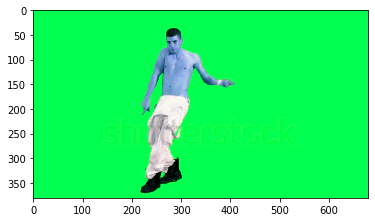

(129, 142) (129, 142) (129, 142)


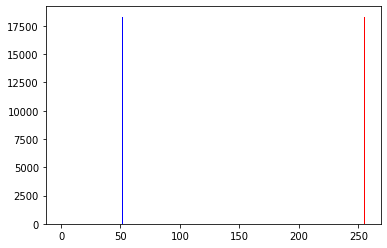

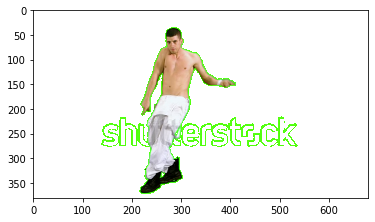

In [17]:
chromakey = cv2.imread('./data/chromakey.png')
plt.imshow(chromakey)
plt.show()

sample = cv2.imread('./data/chromakey_2_2.png')

h,s,v = cv2.split(cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)) # 3개의 채널을 분리해줌
print(h.shape,s.shape,v.shape)
plt.hist(h.ravel(), 256, [0,256] , color = 'b') # h 색종류 빨~주~노~초~ , 50에서 100 사이의 값(색)의 각각 value_counts
plt.hist(s.ravel(), 256, [0,256] , color = 'g') # s 채도 흰색에서 초록 , 0에서 50 사이에 값(선명도)의 각각 value_counts
plt.hist(v.ravel(), 256, [0,256] , color = 'r') # v 명도 어두운영역부터 밝은 영역 , 약 130에서 200 사이에 값(밝기)의 각각 value_counts
plt.show() #생성마다 쓰면 따로 그림

result = chromakey.copy()
hsv = cv2.cvtColor(result, cv2.COLOR_BGR2HSV) # BGR to HSV
h = hsv[:, : , 0]
s = hsv[:, : , 1]
v = hsv[:, : , 2]

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        #bH = h[r,c] >= 0 #and h[r,c] <= 80
        bS = s[r,c] == 255 #and s[r,c] <= 255
        bV = v[r,c] == 255 #and v[r,c] <= 255
        if bS and bV: #초록색인 경우 흰색으로 처리
            result[r,c,:] = [255,255,255]
        else : #초록색인경우 
            result[r,c,0] = chromakey[r,c,0]
            result[r,c,1] = chromakey[r,c,1]
            result[r,c,2] = chromakey[r,c,2]

output = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()



## 크로마키 제외(자동화 O)
1. histogram 사용 x
2. h(색상) 영역에서 가장많은 색을 찾았다.
3. 그 색을 기준으로 +/- 10씩 안에 분포된 색은 모두 다른색으로 변경 

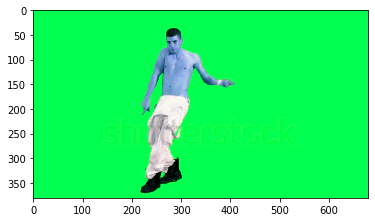

51 255 255


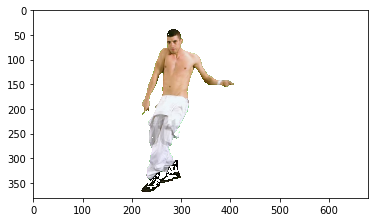

In [18]:
chroma_img = cv2.imread('./data/chromakey.png')
plt.imshow(chroma_img)
plt.show()
result3 = chroma_img.copy()
hsv = cv2.cvtColor(chroma_img, cv2.COLOR_BGR2HSV) # BGR to HSV
h,s,v = cv2.split(cv2.cvtColor(chroma_img, cv2.COLOR_BGR2HSV)) # 3개의 채널을 분리해줌
h = hsv[:, :,0]
s = hsv[:, :,1]
v = hsv[:, :,2]

#ravel을 통해 1차원으로 변환된 값을 array list와 value 별 count 수치를 저장
hh = np.unique(h.ravel(), return_counts=True)
ss = np.unique(s.ravel(), return_counts=True)
vv = np.unique(v.ravel(), return_counts=True)

#argmax 함수를 통해 max 값의 인덱스를 확인하고 해당 인덱스에 해당되는 번호 출력 
maxh = hh[0][np.argmax(hh[1])] 
maxs = ss[0][np.argmax(ss[1])]
maxv = vv[0][np.argmax(vv[1])]

print(maxh, maxs, maxv)

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if maxh-10 <= h[r,c] <= maxh+10: # value가 가장 많은 색의 번호  +/-10 기준
            result3[r,c,:] = [255,255,255]  # 해당되면 흰색으로 처리

output2 = cv2.cvtColor(result3,cv2.COLOR_BGR2RGB)
plt.imshow(output2)



In [19]:
#b[0][np.argmax(b[1])]  의 이해 

a = np.array([1,1,2,3,5,7,3,3,2,2,2,2,7,7,7,7,7,7,7,7,7]) #1차원 배열
b = np.unique(a, return_counts=True)
print("b값은 :" ,b )
print("b[0]값은 :" ,b[0] )
print("b[1]값은 :" ,b[1] )
print("b[1]값은 :" ,b[1] )
print("np.argmax(nparray) 는 해당 리스트에서 제일 큰 값의 인덱스를 반환한다. np.argmax(b[1])값은 : ",np.argmax(b[1]))
print("b[0][np.argmax(b[1])] 값은 : ",b[0][np.argmax(b[1])])

b값은 : (array([1, 2, 3, 5, 7]), array([ 2,  5,  3,  1, 10], dtype=int64))
b[0]값은 : [1 2 3 5 7]
b[1]값은 : [ 2  5  3  1 10]
b[1]값은 : [ 2  5  3  1 10]
np.argmax(nparray) 는 해당 리스트에서 제일 큰 값의 인덱스를 반환한다. np.argmax(b[1])값은 :  4
b[0][np.argmax(b[1])] 값은 :  7
